# Classification Example

This notebook is used to demonstrate 3 different classification ML models. The dataset will be generated via code. The dataset will have 2 features and 2 classes. Outputs will be plotted to give visualization of what the models are doing.

## How To Get Started

Pip install the following libraries:

sklearn

matplotlib

numpy

There are many types of algorythms used for classification. If you'd like to learn more, I encourage you to research.

https://www.geeksforgeeks.org/machine-learning-algorithms/

See below for a list of supervised regression and classification algorythms available in SKLearn:

https://scikit-learn.org/stable/supervised_learning.html



In [10]:
from sklearn.datasets import make_multilabel_classification as make_ml_clf
import matplotlib.pyplot as plt
import numpy as np

X, Y = make_ml_clf(n_samples=1000,n_features=2,n_classes=1,n_labels=2, random_state=1000000000)
#X is your data inputs (i.e. things that you measure, track, the features that you want to feed into you model to make a prediction
#Y are the corresponding labels. in this case, for every row of data, the output is measured either as 0 or 1. Y is also called your target.
print(f"The size of the X array is {X.shape}")
print(f"The size of the Y array is {Y.shape}")

The size of the X array is (1000, 2)
The size of the Y array is (1000, 1)


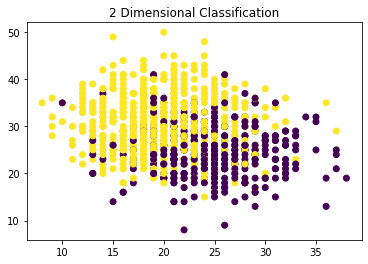

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.title("2 Dimensional Classification")
plt.show()

This problem is abstract right now. Let's make it specific. Let's see if we can create machine learning models that can predict if a person is male or female based on the inputs of height and weight

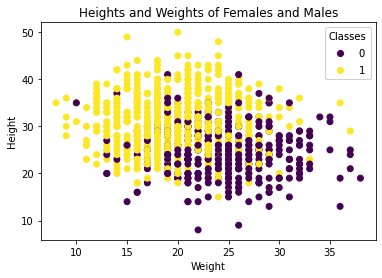

In [12]:
fig, ax = plt.subplots()

scatter = ax.scatter(X[:, 0], X[:, 1], c=Y)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")

ax.add_artist(legend)

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title("Heights and Weights of Females and Males")
plt.show()

#treat 0 as female, 1 as male

### Any questions so far?
.



.




.




.




.

## Standardizing Data

We have data and now we can start the machine learning process.

First, let's standardize our data. this step might not always be required but is generally part of good data housekeeping. This changes the features by removing the mean (mean = 0) and scaling the data to a unit variance (std dev = 1). This step is especially important where you have features that are very sensitive to scale

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

I will show how you scale data but for our example I will use unscaled, original data

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X.mean(axis=0)

array([21.467, 28.785])

In [16]:
X_scaled.mean(axis=0)

array([ 2.52908805e-16, -8.10462808e-18])

In [17]:
X.std(axis=0)

array([5.18101448, 6.40974063])

In [18]:
X_scaled.std(axis=0)

array([1., 1.])

### Any questions so far?
.



.




.




.




.

## Training and Testing Datasets

Next, let's split our data into 2 sets: 1 for training models and 1 for testing models.

We want to use our population of data to train our model, but also keep some data that the model has not yet seen to be able to test how accurate it's predictions are

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [19]:
from sklearn.model_selection import train_test_split


#the below function will split the datasets so that 75% of the data is in the training arrays and 25% will be in the testing arrays. There is no right number to split with.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print(f"The size of the X_train array is {X_train.shape}")
print(f"The size of the y_train array is {y_train.shape}")
print(f"The size of the X_test array is {X_test.shape}")
print(f"The size of the y_test array is {y_test.shape}")

The size of the X_train array is (750, 2)
The size of the y_train array is (750, 1)
The size of the X_test array is (250, 2)
The size of the y_test array is (250, 1)


### So far so good?
.



.




.




.




.


.



.




.




.




.

## Exploring Models

Now we can start looking into machine learning models.

In this notebook, we are going to train 3 different models and test them to analyse which one could be the best for our needs

.



.




.




.




.



### Support Vector Machine

First, let's create a machine learning model using a Support Vector Machine model. More specifically, we will use a type of SVM called C-Support Vector Classification (SVC).

https://scikit-learn.org/stable/modules/svm.html

https://www.geeksforgeeks.org/support-vector-machine-algorithm/?ref=header_outind

In [20]:
from sklearn import svm
#y_train=np.ravel(y_train)
clf_svm = svm.SVC(probability=True)
#the fitting function is what is doing the work of training the model. This "fit" function is the same in most, if not all, SKLearn ML models
clf_svm.fit(X_train,y_train)

C:\Users\jgasior\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [21]:
#we can use the trained clf_svm now to return predictions. For example, what class does a person belong to when they have a weight of 15 and height of 30?
clf_svm.predict([[15,30]])

array([1])

Let's plot the decision boundary of the trained SVM model

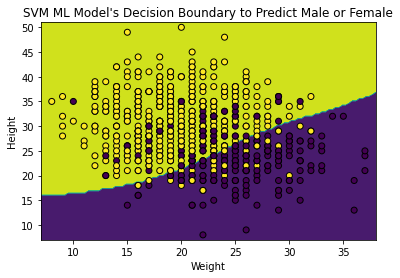

In [23]:
from sklearn.inspection import DecisionBoundaryDisplay

display = DecisionBoundaryDisplay.from_estimator(
    clf_svm, X_train, response_method="predict"
)

#display.plot()
display.ax_.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k"
)

ax.add_artist(legend)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title("SVM ML Model's Decision Boundary to Predict Male or Female")
plt.show()

In [39]:
import pickle

with open('clf_svm.pkl','wb') as f:
    pickle.dump(clf_svm,f)

### Any questions? Does it make sense what this model is doing to create a way to make its prediction?

.



.




.




.




.

### K Nearest Neighbors
Let's now use another Machine Learning model to make an estimate. Let's use a K Nearest Neighbors

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

https://www.geeksforgeeks.org/k-nearest-neighbours/

https://scikit-learn.org/stable/modules/neighbors.html#classification

In [52]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=34)
clf_knn.fit(X_train,y_train)

C:\Users\jgasior\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=34)

In [53]:
#we can use the trained clf_knn now to return predictions. For example, what class does a person belong to when they have a weight of 15 and height of 30?
clf_knn.predict([[15,30]])

array([1])

Let's plot the decision boundary of the trained K Nearest Neighbors model

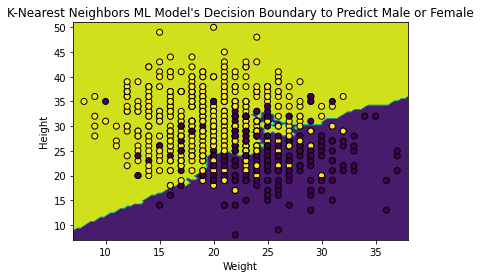

In [54]:
from sklearn.inspection import DecisionBoundaryDisplay

display = DecisionBoundaryDisplay.from_estimator(
    clf_knn, X_train, response_method="predict"
)

#display.plot()
display.ax_.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k"
)

ax.add_artist(legend)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title("K-Nearest Neighbors ML Model's Decision Boundary to Predict Male or Female")
plt.show()

In [55]:
with open('clf_knn.pkl','wb') as f:
    pickle.dump(clf_knn,f)

### Any questions? Do you see how the boundary line moves with the training data?

.



.



.




.



.

### Gaussian Naive Bayes

Let's now use another Machine Learning model to make a prediction. Let's use a Naive Bayes (Gaussian) model

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

https://www.geeksforgeeks.org/naive-bayes-classifiers/?ref=header_outind

In [31]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)

C:\Users\jgasior\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [32]:
#we can use the trained clf_knn now to return predictions. For example, what class does a person belong to when they have a weight of 15 and height of 30?
clf_gnb.predict([[15,30]])

array([1])

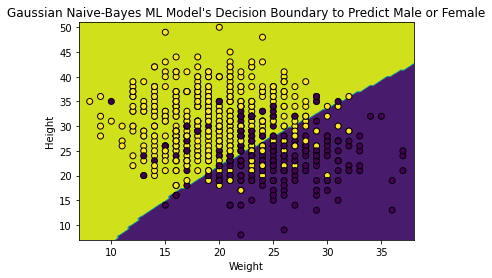

In [36]:
from sklearn.inspection import DecisionBoundaryDisplay

display = DecisionBoundaryDisplay.from_estimator(
    clf_gnb, X_train, response_method="predict"
)

#display.plot()
display.ax_.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k"
)

ax.add_artist(legend)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title("Gaussian Naive-Bayes ML Model's Decision Boundary to Predict Male or Female")
plt.show()

In [37]:
with open('clf_gnb.pkl','wb') as f:
    pickle.dump(clf_gnb,f)

### Food for Thought

GREAT! We trained 3 models: Support Vector Machine, K Nearest Neighbors, and Gaussian Naive Bayes with the same training data. They all predict the same value of 1 (male) when using a height of 30 and weight of 15. However, we see that the boundary (or boundaries) are different for each model.

Which model should we use for our application?

.



.




.





.



.

## Understanding Model Quality

There is no right answer to this. We can use a variety of ways to assess the models. We can base our decision on accuracy alone, or we can try to minimize some kind of error (false positive or false negative), we can look at how the probability density functions of the models compare to the true PDF (cross entropy or log loss), F1 Score, precision & recall.

https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py

### Model Accuracy

Calculating Accuracy of Models. This is where we use our testing partition of the data

In [41]:
from sklearn.metrics import accuracy_score

prediction_svm = clf_svm.predict(X_test) #y_pred

In [42]:
prediction_svm.shape

(250,)

In [43]:
score_svm = accuracy_score(y_test,prediction_svm,normalize=True)
score_svm

0.784

In [56]:
prediction_knn = clf_knn.predict(X_test)
score_knn = accuracy_score(y_test,prediction_knn,normalize=True)

prediction_gnb = clf_gnb.predict(X_test)
score_gnb = accuracy_score(y_test,prediction_gnb,normalize=True)

print(f"SVM model has a score of {score_svm*100}%")
print(f"KNN model has a score of {score_knn*100}%")
print(f"GNB model has a score of {score_gnb*100}%")

SVM model has a score of 78.4%
KNN model has a score of 78.8%
GNB model has a score of 78.4%


We can plot our test data against the trained model to visually see where our correct predictions are and error are

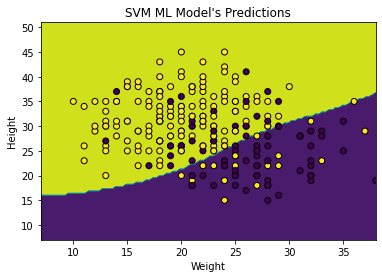

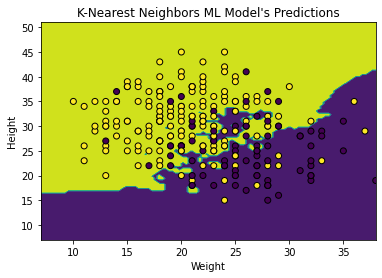

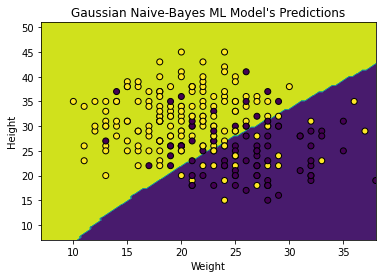

In [45]:
from sklearn.inspection import DecisionBoundaryDisplay

display = DecisionBoundaryDisplay.from_estimator(
    clf_svm, X_train, response_method="predict"
)

#display.plot()
display.ax_.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k"
)

ax.add_artist(legend)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title("SVM ML Model's Predictions")
plt.show()


display = DecisionBoundaryDisplay.from_estimator(
    clf_knn, X_train, response_method="predict"
)

#display.plot()
display.ax_.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k"
)

ax.add_artist(legend)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title("K-Nearest Neighbors ML Model's Predictions")
plt.show()



display = DecisionBoundaryDisplay.from_estimator(
    clf_gnb, X_train, response_method="predict"
)

#display.plot()
display.ax_.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k"
)

ax.add_artist(legend)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title("Gaussian Naive-Bayes ML Model's Predictions")
plt.show()

### What does this tell us? Which model do you think is best?














.



.




.





.



.

### Confusion Matrices

Let's categorize the errors through a confusion matrix for each model

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

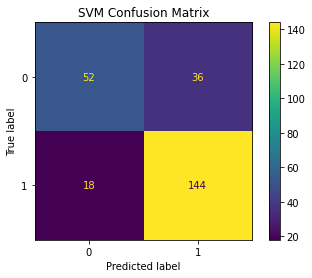

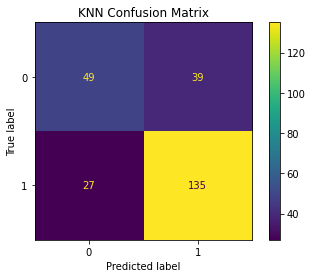

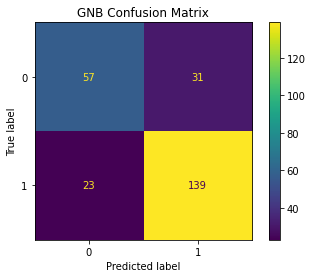

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction_svm)
cm_disp = ConfusionMatrixDisplay(cm).plot()
plt.title('SVM Confusion Matrix')
plt.show()

cm = confusion_matrix(y_test, prediction_knn)
cm_disp = ConfusionMatrixDisplay(cm).plot()
plt.title('KNN Confusion Matrix')
plt.show()

cm = confusion_matrix(y_test, prediction_gnb)
cm_disp = ConfusionMatrixDisplay(cm).plot()
plt.title('GNB Confusion Matrix')
plt.show()



### What does this tell us? Which model would you choose based on what we know so far?

.



.





.




.



.

### Receiver Operator Characteristic

We can also look at the ROC (Receiver Operator Characteristic) Curve. ROC is a measure of SENSITIVITY and SPECIFICITY of a model.

Sensitivity = The probability that the model predicts a positive outcome for an observation when the outcome is indeed positive
Specificity = The probability that the model predicts a negative outcome for an observation when the outcome is indeed negative

The more the curve is biased to the top left corner, the better it does at classifiying data. The Area Under Curve metric (AUC) tells us how close the model is at perfectly classifying data (1 is perfect)

ROC Curves are useful when you have balanced data and you are not too concerned with trying to minimize one type of error over another

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

https://www.statology.org/interpret-roc-curve/

https://www.statology.org/roc-curve-excel/

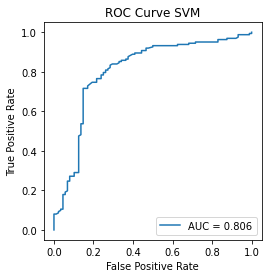

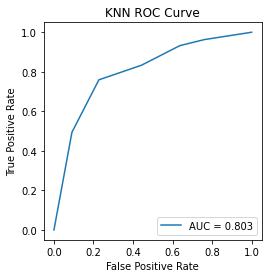

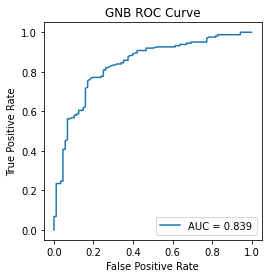

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

y_score = clf_svm.predict_proba(X_test)
y_pos = y_score[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pos)
a_u_c = auc(fpr,tpr)
label = "AUC = " + str(round(a_u_c,3))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(label=label)
plt.title('ROC Curve SVM')
plt.legend(loc='lower right')
plt.axis("square")
plt.show()

y_score = clf_knn.predict_proba(X_test)
y_pos = y_score[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pos)
a_u_c = auc(fpr,tpr)
label = "AUC = " + str(round(a_u_c,3))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(label=label)
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.axis("square")
plt.show()

y_score = clf_gnb.predict_proba(X_test)
y_pos = y_score[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pos)
a_u_c = auc(fpr,tpr)
label = "AUC = " + str(round(a_u_c,3))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(label=label)
plt.title('GNB ROC Curve')
plt.legend(loc='lower right')
plt.axis("square")
plt.show()

### What does this tell us? Which model would you choose based on what we know so far?

.



.





.




.



.

### Precision, Recall

Next, let's look at Precision, Recall and F1 scores.

Precision-Recall is useful (versus ROC curves) when we have more data from 1 class versus another. For example, if you had a dataset with 1000 rows of data, you may find that 90% are labeled as '0' and the remainded are labeled as '1'. There is an imbalance of data in this case


"
Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of the fraction of relevant items among actually returned items while recall is a measure of the fraction of items that were returned among all items that should have been returned. ‘Relevancy’ here refers to items that are postively labeled, i.e., true positives and false negatives.
"

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html


https://www.geeksforgeeks.org/f1-score-in-machine-learning/

https://stackoverflow.com/questions/55740220/macro-vs-micro-vs-weighted-vs-samples-f1-score

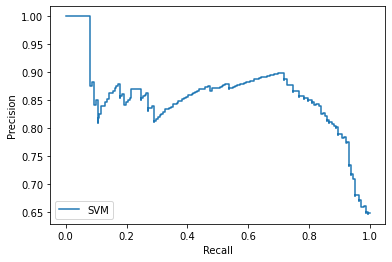

In [48]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

y_score = clf_svm.decision_function(X_test)
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf_svm.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(label='SVM')


In [49]:
from sklearn.metrics import f1_score

y_pred = clf_svm.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.7773804130579614

If you would like to learn more about making Confusion Matrix, ROC and Precision-Recall Curves:

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

For your own learning:

Probability Calibration Curves (Reliability Diagrams):

https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py

https://arize.com/blog-course/what-is-calibration-reliability-curve/

https://towardsdatascience.com/introduction-to-reliability-diagrams-for-probability-calibration-ed785b3f5d44

## More Learning on Metrics For Models

https://scikit-learn.org/stable/modules/model_evaluation.html

.




.




.





.





.


## Model Tuning
Some machine learning algoyrthms have parameters that you can change to 'tune' the model.

How do we make experiments to determine the optimal value of the tuning parameter(s)?



.



.




.




.

### Cross Validation

Let's consider the K Nearest Neighbors model we made. This algorythm uses one parameter that can be changed to change the accuracy of the model, K. Which value of K will be the most accurate for our dataset?

We will use a concept called "cross validation" to determine the right value of K.

https://scikit-learn.org/stable/modules/cross_validation.html

https://www.geeksforgeeks.org/cross-validation-machine-learning/

https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold


Below is an example of a 'home-made' cross validation function. You can use built in functions in SKLearn (i.e. cross_val_score)

In [50]:
import timeit
from sklearn.model_selection import StratifiedKFold

def cross_validation(X,y):
    kf = StratifiedKFold(n_splits=5)
    cv_acc = []
    time = []
    #cross validation from K = 1 t0 100
    for i in range (1,100):
        
        start_time = timeit.default_timer()
        model = KNeighborsClassifier(i)
        acc = []
        
        for train_index, test_index in kf.split(X,y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model.fit(X_train, y_train)
            prediction = model.predict(X_test)
            accuracy = accuracy_score(y_test, prediction)
            acc.append(accuracy)
            
        mean = np.mean(acc)
        cv_acc.append(mean)
        end_time = timeit.default_timer()
        total_time = end_time - start_time
        time.append(1000*total_time)
    
    optimal_param = np.argmax(cv_acc) + 1
    
    print('Total time to cross validate: ' + str(np.sum(time)) + " ms")
    plt.plot(time)
    plt.title('Cross Validation Time per K Value')
    plt.ylabel('Time (ms)')
    plt.show()
    
    print('Ideal parameter: ' + str(optimal_param))
    plt.plot(cv_acc)
    plt.title('Accuracy Score Acros Range of K-Values in KNN Algorythm')
    plt.ylabel('Accuracy Score')
    plt.show()
    return optimal_param
    

C:\Users\jgasior\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jgasior\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jgasior\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jgasior\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y

Total time to cross validate: 3152.0192999987557 ms


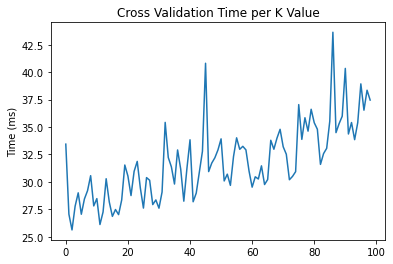

Ideal parameter: 34


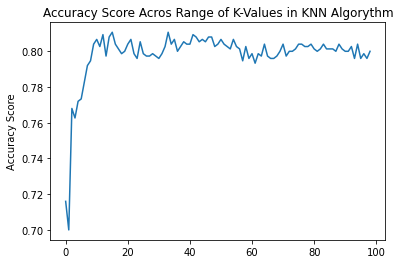

In [51]:
cv = cross_validation(X_train, y_train)

C:\Users\jgasior\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN model has a score of 78.8%


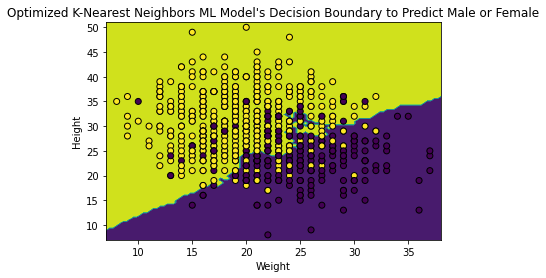

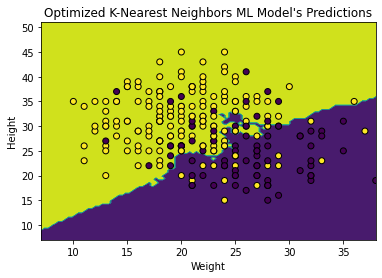

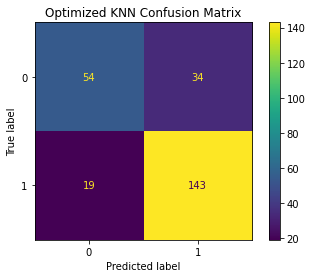

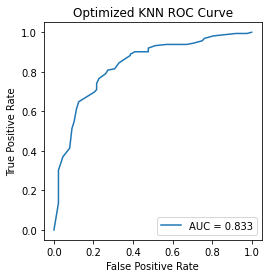

In [57]:
#rerun model with optimized K parameter
clf_knn = KNeighborsClassifier(n_neighbors=cv)
clf_knn.fit(X_train,y_train)

#print accuracy score
prediction_knn = clf_knn.predict(X_test)
score_knn = accuracy_score(y_test,prediction_knn,normalize=True)
print(f"KNN model has a score of {score_knn*100}%")

#plot ML boundary
display = DecisionBoundaryDisplay.from_estimator(
    clf_knn, X_train, response_method="predict"
)

#display.plot()
display.ax_.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k"
)

ax.add_artist(legend)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title("Optimized K-Nearest Neighbors ML Model's Decision Boundary to Predict Male or Female")
plt.show()


#plot test data on ML boundary
display = DecisionBoundaryDisplay.from_estimator(
    clf_knn, X_train, response_method="predict"
)

#display.plot()
display.ax_.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k"
)

ax.add_artist(legend)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title("Optimized K-Nearest Neighbors ML Model's Predictions")
plt.show()

#plot confusion matrix
cm = confusion_matrix(y_test, prediction_knn)
cm_disp = ConfusionMatrixDisplay(cm).plot()
plt.title('Optimized KNN Confusion Matrix')
plt.show()

#plot ROC Curve
y_score = clf_knn.predict_proba(X_test)
y_pos = y_score[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pos)
a_u_c = auc(fpr,tpr)
label = "AUC = " + str(round(a_u_c,3))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(label=label)
plt.title('Optimized KNN ROC Curve')
plt.legend(loc='lower right')
plt.axis("square")
plt.show()